# 1章

In [66]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
from matplotlib.ticker import MaxNLocator
from glob import glob

os.listdir('data')

['mst_corp_kind.csv',
 'mst_hihyoji.csv',
 '22_shizuoka_all_20210331.csv',
 'diff_20210405.csv',
 'diff_20210407.csv',
 'diff_20210406.csv',
 'output',
 'diff_20210401.csv',
 'mst_process_kbn.csv',
 'mst_column_name.txt',
 'mst_latest.csv',
 'mst_closeCause.csv',
 'diff_20210408.csv',
 'diff_20210409.csv',
 'mst_correct_kbn.csv']

## ノック1

In [2]:
data = pd.read_csv('data/22_shizuoka_all_20210331.csv', encoding='shift-jis')

In [3]:
data.head()

,1,1000013040008,01,1.1,2018-04-02,2015-10-05,静岡家庭裁判所,Unnamed: 7,101,静岡県,...,Unnamed: 20,Unnamed: 21,2015-10-05.1,1.2,Shizuoka Family Court,Shizuoka,"1-20, Jonaicho, Aoi ku, Shizuoka shi",Unnamed: 27,シズオカカテイサイバンショ,0
0,2,1000013050072,1,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,NaN,NaN,2015-10-05,1,Shimizu Summary Court,Shizuoka,"1-6-15, Tenjin, Shimizu ku, Shizuoka shi",NaN,シミズカンイサイバンショ,0
1,3,1000013050080,1,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,NaN,NaN,2015-10-05,1,Hamamatsu Summary Court,Shizuoka,"1-12-5, Chuo, Naka ku, Hamamatsu shi",NaN,ハママツカンイサイバンショ,0
2,4,1000020222119,1,1,2018-04-05,2015-10-05,磐田市,NaN,201,静岡県,...,NaN,NaN,2015-10-05,1,Iwata City,Shizuoka,"3-1,Kounodai, Iwata shi",NaN,イワタシ,0
3,5,1000020222127,1,1,2018-04-05,2015-10-05,焼津市,NaN,201,静岡県,...,NaN,NaN,2015-10-05,1,Yaizu city,Shizuoka,"2-16-32 Honmachi, Yaizu shi",NaN,ヤイヅシ,0
4,6,1000020222135,1,1,2020-09-29,2015-10-05,掛川市,NaN,201,静岡県,...,NaN,NaN,2015-10-05,1,Kakegawa City,Shizuoka,"1-1-1 Nagaya, Kakegawa shi",NaN,カケガワシ,0


In [4]:
len(data)

114612

## ノック2

In [5]:
data.columns

Index(['1', '1000013040008', '01', '1.1', '2018-04-02', '2015-10-05',
       '静岡家庭裁判所', 'Unnamed: 7', '101', '静岡県', '静岡市葵区', '城内町１−２０',
       'Unnamed: 12', '22', '101.1', '4200854', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       '2015-10-05.1', '1.2', 'Shizuoka Family Court', 'Shizuoka',
       '1-20, Jonaicho, Aoi ku, Shizuoka shi', 'Unnamed: 27', 'シズオカカテイサイバンショ',
       '0'],
      dtype='object')

In [6]:
data.dtypes

1                                         int64
1000013040008                             int64
01                                        int64
1.1                                       int64
2018-04-02                               object
2015-10-05                               object
静岡家庭裁判所                                  object
Unnamed: 7                              float64
101                                       int64
静岡県                                      object
静岡市葵区                                    object
城内町１−２０                                  object
Unnamed: 12                             float64
22                                        int64
101.1                                     int64
4200854                                 float64
Unnamed: 16                             float64
Unnamed: 17                             float64
Unnamed: 18                              object
Unnamed: 19                             float64
Unnamed: 20                             

## ノック3

In [7]:
mst = pd.read_csv('data/mst_column_name.txt', encoding='shift-jis', sep='\t')
mst.head()

,column_id,column_name_ja,column_name_en
0,1,一連番号,sequenceNumber
1,2,法人番号,corporateNumber
2,3,処理区分,process
3,4,訂正区分,correct
4,5,更新年月日,updateDate


## ノック4

In [8]:
columns = mst.column_name_en.values
columns

array(['sequenceNumber', 'corporateNumber', 'process', 'correct',
       'updateDate', 'changeDate', 'name', 'nameImageId', 'kind',
       'prefectureName', 'cityName', 'streetNumber', 'addressImageId',
       'prefectureCode', 'cityCode', 'postCode', 'addressOutside',
       'addressOutsideImageId', 'closeDate', 'closeCause',
       'successorCorporateNumber', 'changeCause', 'assignmentDate',
       'latest', 'enName', 'enPrefectureName', 'enCityName',
       'enAddressOutside', 'furigana', 'hihyoji'], dtype=object)

In [9]:
data.columns = columns
data.head()

,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,successorCorporateNumber,changeCause,assignmentDate,latest,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji
0,2,1000013050072,1,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,NaN,NaN,2015-10-05,1,Shimizu Summary Court,Shizuoka,"1-6-15, Tenjin, Shimizu ku, Shizuoka shi",NaN,シミズカンイサイバンショ,0
1,3,1000013050080,1,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,NaN,NaN,2015-10-05,1,Hamamatsu Summary Court,Shizuoka,"1-12-5, Chuo, Naka ku, Hamamatsu shi",NaN,ハママツカンイサイバンショ,0
2,4,1000020222119,1,1,2018-04-05,2015-10-05,磐田市,NaN,201,静岡県,...,NaN,NaN,2015-10-05,1,Iwata City,Shizuoka,"3-1,Kounodai, Iwata shi",NaN,イワタシ,0
3,5,1000020222127,1,1,2018-04-05,2015-10-05,焼津市,NaN,201,静岡県,...,NaN,NaN,2015-10-05,1,Yaizu city,Shizuoka,"2-16-32 Honmachi, Yaizu shi",NaN,ヤイヅシ,0
4,6,1000020222135,1,1,2020-09-29,2015-10-05,掛川市,NaN,201,静岡県,...,NaN,NaN,2015-10-05,1,Kakegawa City,Shizuoka,"1-1-1 Nagaya, Kakegawa shi",NaN,カケガワシ,0


## ノック5

In [10]:
data.describe()

,sequenceNumber,corporateNumber,process,correct,nameImageId,kind,addressImageId,prefectureCode,cityCode,postCode,addressOutside,addressOutsideImageId,closeCause,successorCorporateNumber,latest,enAddressOutside,hihyoji
count,114612.000000,1.146120e+05,114612.000000,114612.000000,1243.000000,114612.000000,1195.000000,114612.0,114612.000000,1.144390e+05,0.0,0.0,10077.000000,6.660000e+02,114612.0,0.0,114612.000000
mean,57307.500000,5.085830e+12,3.976207,0.295850,71557.514883,314.467421,81666.374895,22.0,178.327069,4.231843e+06,NaN,NaN,5.190731,4.957128e+12,1.0,NaN,0.001963
std,33085.778863,2.581516e+12,7.453964,0.456426,11848.454350,34.827319,13422.273042,0.0,64.170140,8.983927e+04,NaN,NaN,7.758547,2.587259e+12,0.0,NaN,0.044264
min,2.000000,1.000013e+12,1.000000,0.000000,67209.000000,101.000000,67247.000000,22.0,100.000000,4.100000e+06,NaN,NaN,1.000000,1.010001e+12,1.0,NaN,0.000000
25%,28654.750000,3.080002e+12,1.000000,0.000000,67695.500000,301.000000,79441.500000,22.0,131.000000,4.160907e+06,NaN,NaN,1.000000,3.080001e+12,1.0,NaN,0.000000
50%,57307.500000,5.080102e+12,1.000000,0.000000,68059.000000,302.000000,79792.000000,22.0,203.000000,4.228034e+06,NaN,NaN,1.000000,5.025501e+12,1.0,NaN,0.000000
75%,85960.250000,7.080401e+12,1.000000,1.000000,68445.000000,302.000000,80115.500000,22.0,212.000000,4.312102e+06,NaN,NaN,1.000000,7.080401e+12,1.0,NaN,0.000000
max,114613.000000,9.700150e+12,71.000000,1.000000,121799.000000,499.000000,122416.000000,22.0,484.000000,4.390037e+06,NaN,NaN,31.000000,9.180301e+12,1.0,NaN,1.000000


In [11]:
data.isna().sum()

sequenceNumber                   0
corporateNumber                  0
process                          0
correct                          0
updateDate                       0
changeDate                       0
name                             0
nameImageId                 113369
kind                             0
prefectureName                   0
cityName                         0
streetNumber                    17
addressImageId              113417
prefectureCode                   0
cityCode                         0
postCode                       173
addressOutside              114612
addressOutsideImageId       114612
closeDate                   104535
closeCause                  104535
successorCorporateNumber    113946
changeCause                 113501
assignmentDate                   0
latest                           0
enName                      114381
enPrefectureName            114383
enCityName                  114383
enAddressOutside            114612
furigana            

## ノック6

In [12]:
diff_diles = glob('data/diff*.csv')
diff_diles

['data/diff_20210405.csv',
 'data/diff_20210407.csv',
 'data/diff_20210406.csv',
 'data/diff_20210401.csv',
 'data/diff_20210408.csv',
 'data/diff_20210409.csv']

In [13]:
diff_diles.sort()
diff = pd.read_csv(diff_diles[0], encoding='shift-jis', header=None, dtype=object)
print(len(diff))
diff.head()

2316


,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1,1010001016019,71,0,2021-04-01,2021-03-01,株式会社国際漢方研究所,NaN,301,東京都,...,NaN,令和３年３月１日東京都渋谷区千駄ヶ谷五丁目２９番１１号ナカニシビル６０２号室株式会社Ｉｎｔｅ...,2015-10-05,1,NaN,NaN,NaN,NaN,コクサイカンポウケンキュウショ,0
1,2,1010001092869,01,1,2021-04-01,2020-06-11,あさひ銀リテールファイナンス株式会社,NaN,301,東京都,...,NaN,NaN,2020-06-11,0,NaN,NaN,NaN,NaN,アサヒギンリテールファイナンス,0
2,3,1010001092869,21,0,2021-04-01,2021-03-22,あさひ銀リテールファイナンス株式会社,NaN,301,東京都,...,NaN,NaN,2020-06-11,1,NaN,NaN,NaN,NaN,アサヒギンリテールファイナンス,0
3,4,1010001128061,01,1,2021-04-01,2015-10-05,日本アイ・ビー・エム株式会社,NaN,301,東京都,...,NaN,NaN,2015-10-05,0,NaN,NaN,NaN,NaN,ニホンアイビーエム,0
4,5,1010001128061,71,1,2021-04-01,2017-10-02,日本アイ・ビー・エム株式会社,NaN,301,東京都,...,NaN,平成２９年１０月１日東京都中央区日本橋箱崎町１９番２１号アイ・ビー・エム・アジア・パシフィッ...,2015-10-05,1,NaN,NaN,NaN,NaN,ニホンアイビーエム,0


In [14]:
diff.columns = columns
diff.head()

,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,successorCorporateNumber,changeCause,assignmentDate,latest,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji
0,1,1010001016019,71,0,2021-04-01,2021-03-01,株式会社国際漢方研究所,NaN,301,東京都,...,NaN,令和３年３月１日東京都渋谷区千駄ヶ谷五丁目２９番１１号ナカニシビル６０２号室株式会社Ｉｎｔｅ...,2015-10-05,1,NaN,NaN,NaN,NaN,コクサイカンポウケンキュウショ,0
1,2,1010001092869,01,1,2021-04-01,2020-06-11,あさひ銀リテールファイナンス株式会社,NaN,301,東京都,...,NaN,NaN,2020-06-11,0,NaN,NaN,NaN,NaN,アサヒギンリテールファイナンス,0
2,3,1010001092869,21,0,2021-04-01,2021-03-22,あさひ銀リテールファイナンス株式会社,NaN,301,東京都,...,NaN,NaN,2020-06-11,1,NaN,NaN,NaN,NaN,アサヒギンリテールファイナンス,0
3,4,1010001128061,01,1,2021-04-01,2015-10-05,日本アイ・ビー・エム株式会社,NaN,301,東京都,...,NaN,NaN,2015-10-05,0,NaN,NaN,NaN,NaN,ニホンアイビーエム,0
4,5,1010001128061,71,1,2021-04-01,2017-10-02,日本アイ・ビー・エム株式会社,NaN,301,東京都,...,NaN,平成２９年１０月１日東京都中央区日本橋箱崎町１９番２１号アイ・ビー・エム・アジア・パシフィッ...,2015-10-05,1,NaN,NaN,NaN,NaN,ニホンアイビーエム,0


In [15]:
diff = diff.loc[diff['prefectureName'] == '静岡県']
print(len(diff))
diff.head()

43


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,successorCorporateNumber,changeCause,assignmentDate,latest,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji
107,108,1080001015906,01,1,2021-04-01,2015-10-05,株式会社エムケイテック,NaN,301,静岡県,...,NaN,NaN,2015-10-05,0,NaN,NaN,NaN,NaN,エムケイテック,0
108,109,1080001015906,12,1,2021-04-01,2021-03-30,株式会社エムケイテック,NaN,301,静岡県,...,NaN,NaN,2015-10-05,1,NaN,NaN,NaN,NaN,エムケイテック,0
109,110,1080002015434,01,1,2021-04-01,2015-10-05,有限会社ハイナンＤＣ,NaN,302,静岡県,...,NaN,NaN,2015-10-05,1,NaN,NaN,NaN,NaN,ハイナンディーシー,0
110,111,1080105005588,12,0,2021-04-01,2021-03-25,認定特定非営利活動法人ＲＥＡＬＥ ＷＯＲＬＤ,NaN,399,静岡県,...,NaN,NaN,2015-12-11,1,NaN,NaN,NaN,NaN,レアーレワールド,0
111,112,1080401024928,01,0,2021-04-01,2021-04-01,ＡＧＡＩＮＮＴ’Ｓ株式会社,NaN,301,静岡県,...,NaN,NaN,2021-04-01,1,NaN,NaN,NaN,NaN,アゲインツ,0


In [16]:
for f in diff_diles:
    print(f)
    diff = pd.read_csv(f, encoding='shift-jis', header=None, dtype=object)
    diff.columns = columns
    diff = diff.loc[diff['prefectureName'] == '静岡県']
    data = data.append(diff)
print(len(data))
data.head()

data/diff_20210401.csv
data/diff_20210405.csv
data/diff_20210406.csv
data/diff_20210407.csv
data/diff_20210408.csv
data/diff_20210409.csv
115019


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,successorCorporateNumber,changeCause,assignmentDate,latest,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji
0,2,1000013050072,1,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,NaN,NaN,2015-10-05,1,Shimizu Summary Court,Shizuoka,"1-6-15, Tenjin, Shimizu ku, Shizuoka shi",NaN,シミズカンイサイバンショ,0
1,3,1000013050080,1,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,NaN,NaN,2015-10-05,1,Hamamatsu Summary Court,Shizuoka,"1-12-5, Chuo, Naka ku, Hamamatsu shi",NaN,ハママツカンイサイバンショ,0
2,4,1000020222119,1,1,2018-04-05,2015-10-05,磐田市,NaN,201,静岡県,...,NaN,NaN,2015-10-05,1,Iwata City,Shizuoka,"3-1,Kounodai, Iwata shi",NaN,イワタシ,0
3,5,1000020222127,1,1,2018-04-05,2015-10-05,焼津市,NaN,201,静岡県,...,NaN,NaN,2015-10-05,1,Yaizu city,Shizuoka,"2-16-32 Honmachi, Yaizu shi",NaN,ヤイヅシ,0
4,6,1000020222135,1,1,2020-09-29,2015-10-05,掛川市,NaN,201,静岡県,...,NaN,NaN,2015-10-05,1,Kakegawa City,Shizuoka,"1-1-1 Nagaya, Kakegawa shi",NaN,カケガワシ,0


In [17]:
print(data[data["corporateNumber"].duplicated()])

     sequenceNumber corporateNumber process correct  updateDate  changeDate  \
108             109   1080001015906      12       1  2021-04-01  2021-03-30   
331             332   2080401020653      71       1  2021-04-01  2021-03-02   
1706           1707   6080001007576      12       1  2021-04-05  2016-01-04   
1707           1708   6080001007576      12       1  2021-04-05  2021-04-01   
2029           2030   7080001019959      12       1  2021-04-05  2021-04-01   
2730           2731   9080101019155      12       1  2021-04-05  2021-03-30   
892             893   3080003001885      01       1  2021-04-06  2016-07-25   
893             894   3080003001885      12       1  2021-04-06  2021-03-31   
1980           1981   6080002011247      12       1  2021-04-06  2021-04-01   
3035           3036   9080401016199      12       1  2021-04-06  2016-12-01   
3041           3042   9080402000912      21       0  2021-04-06  2021-03-31   
592             593   2080101005681      12       1 

In [18]:
data.drop_duplicates(subset=['corporateNumber'], keep='last', inplace=True)

In [19]:
data.isna().sum()

sequenceNumber                   0
corporateNumber                  0
process                          0
correct                          0
updateDate                       0
changeDate                       0
name                             0
nameImageId                 113736
kind                             0
prefectureName                   0
cityName                         0
streetNumber                    17
addressImageId              113784
prefectureCode                   0
cityCode                         0
postCode                       173
addressOutside              114982
addressOutsideImageId       114982
closeDate                   104874
closeCause                  104874
successorCorporateNumber    114304
changeCause                 113852
assignmentDate                   0
latest                           0
enName                      114750
enPrefectureName            114752
enCityName                  114752
enAddressOutside            114982
furigana            

## ノック7

In [20]:
mst_process_kdn = pd.read_csv('data/mst_process_kbn.csv', dtype=object)
mst_process_kdn

,process,process_kbn_name
0,01,新規
1,11,商号又は名称の変更
2,12,国内所在地の変更
3,13,国外所在地の変更
4,21,登記記録の閉鎖等
5,22,登記記録の復活等
6,71,吸収合併
7,72,吸収合併無効
8,81,商号の登記の抹消
9,99,削除


In [21]:
data = data.merge(mst_process_kdn, on='process', how='left')

In [22]:
mst_latest = pd.read_csv('data/mst_latest.csv', dtype=object)
mst_latest

,latest,latest_name
0,0,過去情報
1,1,最新情報


In [23]:
data = data.merge(mst_latest, on='latest', how='left')
data

,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,assignmentDate,latest,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji,process_kbn_name,latest_name
0,2,1000013050072,1,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,2015-10-05,1,Shimizu Summary Court,Shizuoka,"1-6-15, Tenjin, Shimizu ku, Shizuoka shi",NaN,シミズカンイサイバンショ,0,NaN,NaN
1,3,1000013050080,1,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,2015-10-05,1,Hamamatsu Summary Court,Shizuoka,"1-12-5, Chuo, Naka ku, Hamamatsu shi",NaN,ハママツカンイサイバンショ,0,NaN,NaN
2,4,1000020222119,1,1,2018-04-05,2015-10-05,磐田市,NaN,201,静岡県,...,2015-10-05,1,Iwata City,Shizuoka,"3-1,Kounodai, Iwata shi",NaN,イワタシ,0,NaN,NaN
3,5,1000020222127,1,1,2018-04-05,2015-10-05,焼津市,NaN,201,静岡県,...,2015-10-05,1,Yaizu city,Shizuoka,"2-16-32 Honmachi, Yaizu shi",NaN,ヤイヅシ,0,NaN,NaN
4,6,1000020222135,1,1,2020-09-29,2015-10-05,掛川市,NaN,201,静岡県,...,2015-10-05,1,Kakegawa City,Shizuoka,"1-1-1 Nagaya, Kakegawa shi",NaN,カケガワシ,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114977,3195,9080001021673,01,1,2021-04-09,2017-07-07,株式会社ＡＣＴ,NaN,301,静岡県,...,2017-07-07,1,NaN,NaN,NaN,NaN,アクト,0,新規,最新情報
114978,3196,9080101022431,01,0,2021-04-09,2021-04-09,株式会社ＬＥＳＱＵＡ,NaN,301,静岡県,...,2021-04-09,1,NaN,NaN,NaN,NaN,レスカ,0,新規,最新情報
114979,3197,9080102008933,01,1,2021-04-09,2015-10-05,有限会社サクラ急送,NaN,302,静岡県,...,2015-10-05,1,NaN,NaN,NaN,NaN,サクラキュウソウ,0,新規,最新情報
114980,3198,9080402002859,21,0,2021-04-09,2021-04-01,有限会社弘法,NaN,302,静岡県,...,2015-10-05,1,NaN,NaN,NaN,NaN,コウボウ,0,登記記録の閉鎖等,最新情報


In [24]:
mst_hihyoji = pd.read_csv('data/mst_hihyoji.csv', dtype=object)
mst_hihyoji

,hihyoji,hihyoji_name
0,0,検索対象
1,1,検索対象除外


In [25]:
data = data.merge(mst_hihyoji, on='hihyoji', how='left')
data

,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,latest,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji,process_kbn_name,latest_name,hihyoji_name
0,2,1000013050072,1,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,1,Shimizu Summary Court,Shizuoka,"1-6-15, Tenjin, Shimizu ku, Shizuoka shi",NaN,シミズカンイサイバンショ,0,NaN,NaN,NaN
1,3,1000013050080,1,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,1,Hamamatsu Summary Court,Shizuoka,"1-12-5, Chuo, Naka ku, Hamamatsu shi",NaN,ハママツカンイサイバンショ,0,NaN,NaN,NaN
2,4,1000020222119,1,1,2018-04-05,2015-10-05,磐田市,NaN,201,静岡県,...,1,Iwata City,Shizuoka,"3-1,Kounodai, Iwata shi",NaN,イワタシ,0,NaN,NaN,NaN
3,5,1000020222127,1,1,2018-04-05,2015-10-05,焼津市,NaN,201,静岡県,...,1,Yaizu city,Shizuoka,"2-16-32 Honmachi, Yaizu shi",NaN,ヤイヅシ,0,NaN,NaN,NaN
4,6,1000020222135,1,1,2020-09-29,2015-10-05,掛川市,NaN,201,静岡県,...,1,Kakegawa City,Shizuoka,"1-1-1 Nagaya, Kakegawa shi",NaN,カケガワシ,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114977,3195,9080001021673,01,1,2021-04-09,2017-07-07,株式会社ＡＣＴ,NaN,301,静岡県,...,1,NaN,NaN,NaN,NaN,アクト,0,新規,最新情報,検索対象
114978,3196,9080101022431,01,0,2021-04-09,2021-04-09,株式会社ＬＥＳＱＵＡ,NaN,301,静岡県,...,1,NaN,NaN,NaN,NaN,レスカ,0,新規,最新情報,検索対象
114979,3197,9080102008933,01,1,2021-04-09,2015-10-05,有限会社サクラ急送,NaN,302,静岡県,...,1,NaN,NaN,NaN,NaN,サクラキュウソウ,0,新規,最新情報,検索対象
114980,3198,9080402002859,21,0,2021-04-09,2021-04-01,有限会社弘法,NaN,302,静岡県,...,1,NaN,NaN,NaN,NaN,コウボウ,0,登記記録の閉鎖等,最新情報,検索対象


## ノック8

In [26]:
data[['prefectureName', 'cityName', 'streetNumber']].isna().sum()

prefectureName     0
cityName           0
streetNumber      17
dtype: int64

In [27]:
data['address'] = data['prefectureName'] + data['cityName'] + data['streetNumber']
data.head()

,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,enName,enPrefectureName,enCityName,enAddressOutside,furigana,hihyoji,process_kbn_name,latest_name,hihyoji_name,address
0,2,1000013050072,1,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,Shimizu Summary Court,Shizuoka,"1-6-15, Tenjin, Shimizu ku, Shizuoka shi",NaN,シミズカンイサイバンショ,0,NaN,NaN,NaN,静岡県静岡市清水区天神１丁目６−１５
1,3,1000013050080,1,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,Hamamatsu Summary Court,Shizuoka,"1-12-5, Chuo, Naka ku, Hamamatsu shi",NaN,ハママツカンイサイバンショ,0,NaN,NaN,NaN,静岡県浜松市中区中央１丁目１２−５
2,4,1000020222119,1,1,2018-04-05,2015-10-05,磐田市,NaN,201,静岡県,...,Iwata City,Shizuoka,"3-1,Kounodai, Iwata shi",NaN,イワタシ,0,NaN,NaN,NaN,静岡県磐田市国府台３−１
3,5,1000020222127,1,1,2018-04-05,2015-10-05,焼津市,NaN,201,静岡県,...,Yaizu city,Shizuoka,"2-16-32 Honmachi, Yaizu shi",NaN,ヤイヅシ,0,NaN,NaN,NaN,静岡県焼津市本町２丁目１６−３２
4,6,1000020222135,1,1,2020-09-29,2015-10-05,掛川市,NaN,201,静岡県,...,Kakegawa City,Shizuoka,"1-1-1 Nagaya, Kakegawa shi",NaN,カケガワシ,0,NaN,NaN,NaN,静岡県掛川市長谷１丁目１番地の１


In [28]:
data['address'].loc[data['streetNumber'].isna()] = data['prefectureName'] + data['cityName']

In [29]:
data['postCode_tail'] = data['postCode'].str[-4:]

## ノック9

In [30]:
dt_columns = ['updateDate', 'changeDate', 'closeDate', 'assignmentDate']
for col in dt_columns:
  data[col] = pd.to_datetime(data[col])

In [31]:
data['corporate_life'] = data['closeDate'] - data['assignmentDate']
print(len(data.columns))
data.head()

36


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,enCityName,enAddressOutside,furigana,hihyoji,process_kbn_name,latest_name,hihyoji_name,address,postCode_tail,corporate_life
0,2,1000013050072,1,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,"1-6-15, Tenjin, Shimizu ku, Shizuoka shi",NaN,シミズカンイサイバンショ,0,NaN,NaN,NaN,静岡県静岡市清水区天神１丁目６−１５,NaN,NaT
1,3,1000013050080,1,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,"1-12-5, Chuo, Naka ku, Hamamatsu shi",NaN,ハママツカンイサイバンショ,0,NaN,NaN,NaN,静岡県浜松市中区中央１丁目１２−５,NaN,NaT
2,4,1000020222119,1,1,2018-04-05,2015-10-05,磐田市,NaN,201,静岡県,...,"3-1,Kounodai, Iwata shi",NaN,イワタシ,0,NaN,NaN,NaN,静岡県磐田市国府台３−１,NaN,NaT
3,5,1000020222127,1,1,2018-04-05,2015-10-05,焼津市,NaN,201,静岡県,...,"2-16-32 Honmachi, Yaizu shi",NaN,ヤイヅシ,0,NaN,NaN,NaN,静岡県焼津市本町２丁目１６−３２,NaN,NaT
4,6,1000020222135,1,1,2020-09-29,2015-10-05,掛川市,NaN,201,静岡県,...,"1-1-1 Nagaya, Kakegawa shi",NaN,カケガワシ,0,NaN,NaN,NaN,静岡県掛川市長谷１丁目１番地の１,NaN,NaT


In [32]:
data['update_YM'] = data['updateDate'].dt.to_period('M')
print(len(data.columns))
data.head()

37


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,enAddressOutside,furigana,hihyoji,process_kbn_name,latest_name,hihyoji_name,address,postCode_tail,corporate_life,update_YM
0,2,1000013050072,1,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,NaN,シミズカンイサイバンショ,0,NaN,NaN,NaN,静岡県静岡市清水区天神１丁目６−１５,NaN,NaT,2018-04
1,3,1000013050080,1,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,NaN,ハママツカンイサイバンショ,0,NaN,NaN,NaN,静岡県浜松市中区中央１丁目１２−５,NaN,NaT,2018-04
2,4,1000020222119,1,1,2018-04-05,2015-10-05,磐田市,NaN,201,静岡県,...,NaN,イワタシ,0,NaN,NaN,NaN,静岡県磐田市国府台３−１,NaN,NaT,2018-04
3,5,1000020222127,1,1,2018-04-05,2015-10-05,焼津市,NaN,201,静岡県,...,NaN,ヤイヅシ,0,NaN,NaN,NaN,静岡県焼津市本町２丁目１６−３２,NaN,NaT,2018-04
4,6,1000020222135,1,1,2020-09-29,2015-10-05,掛川市,NaN,201,静岡県,...,NaN,カケガワシ,0,NaN,NaN,NaN,静岡県掛川市長谷１丁目１番地の１,NaN,NaT,2020-09


In [33]:
dt_prefixes = ['assignment', 'change', 'update', 'close']
for pre in dt_prefixes:
  data[f'{pre}_YM'] = data[f'{pre}Date'].dt.to_period('M')

In [34]:
print(len(data.columns))
data.head()

40


,sequenceNumber,corporateNumber,process,correct,updateDate,changeDate,name,nameImageId,kind,prefectureName,...,process_kbn_name,latest_name,hihyoji_name,address,postCode_tail,corporate_life,update_YM,assignment_YM,change_YM,close_YM
0,2,1000013050072,1,1,2018-04-02,2015-10-05,清水簡易裁判所,NaN,101,静岡県,...,NaN,NaN,NaN,静岡県静岡市清水区天神１丁目６−１５,NaN,NaT,2018-04,2015-10,2015-10,NaT
1,3,1000013050080,1,1,2018-04-02,2015-10-05,浜松簡易裁判所,NaN,101,静岡県,...,NaN,NaN,NaN,静岡県浜松市中区中央１丁目１２−５,NaN,NaT,2018-04,2015-10,2015-10,NaT
2,4,1000020222119,1,1,2018-04-05,2015-10-05,磐田市,NaN,201,静岡県,...,NaN,NaN,NaN,静岡県磐田市国府台３−１,NaN,NaT,2018-04,2015-10,2015-10,NaT
3,5,1000020222127,1,1,2018-04-05,2015-10-05,焼津市,NaN,201,静岡県,...,NaN,NaN,NaN,静岡県焼津市本町２丁目１６−３２,NaN,NaT,2018-04,2015-10,2015-10,NaT
4,6,1000020222135,1,1,2020-09-29,2015-10-05,掛川市,NaN,201,静岡県,...,NaN,NaN,NaN,静岡県掛川市長谷１丁目１番地の１,NaN,NaT,2020-09,2015-10,2015-10,NaT


In [35]:
data.dtypes

sequenceNumber                       object
corporateNumber                      object
process                              object
correct                              object
updateDate                   datetime64[ns]
changeDate                   datetime64[ns]
name                                 object
nameImageId                          object
kind                                 object
prefectureName                       object
cityName                             object
streetNumber                         object
addressImageId                       object
prefectureCode                       object
cityCode                             object
postCode                             object
addressOutside                       object
addressOutsideImageId                object
closeDate                    datetime64[ns]
closeCause                           object
successorCorporateNumber             object
changeCause                          object
assignmentDate               dat

## ノック10

In [36]:
data['update_year'] = pd.DatetimeIndex(data['updateDate']).year
data['update_month'] = pd.DatetimeIndex(data['updateDate']).month
data['update_fiscal_year'] = pd.DatetimeIndex(data['updateDate']).year
data.loc[data['update_month'] < 4, 'update_fiscal_year'] -= 1

In [37]:
for i in range(12):
  display(data[['update_YM', 'update_fiscal_year']].loc[data['update_month'] == i+1 ][:1])

,update_YM,update_fiscal_year
44,2019-01,2018


,update_YM,update_fiscal_year
31,2021-02,2020


,update_YM,update_fiscal_year
29,2021-03,2020


,update_YM,update_fiscal_year
0,2018-04,2018


,update_YM,update_fiscal_year
46,2017-05,2017


,update_YM,update_fiscal_year
33,2018-06,2018


,update_YM,update_fiscal_year
56,2018-07,2018


,update_YM,update_fiscal_year
28,2018-08,2018


,update_YM,update_fiscal_year
4,2020-09,2020


,update_YM,update_fiscal_year
41,2019-10,2019


,update_YM,update_fiscal_year
26,2015-11,2015


,update_YM,update_fiscal_year
27,2017-12,2017


## ノック11

In [38]:
output_dir = 'data/output'
os.makedirs(output_dir, exist_ok=True)

In [39]:
output_file = 'processed_shizuoka.csv'
data.to_csv(os.path.join(output_dir, output_file), index=False)
output_file = output_file.replace('.csv', '.xlsx')
data.to_excel(os.path.join(output_dir, output_file), index=False)

##　ノック12

In [40]:
data = data[['cityName', 'corporateNumber', 'name', 'process', 'process_kbn_name', 'assignmentDate', 'updateDate', 'update_fiscal_year', 'update_YM']]

In [41]:
data = data.drop(columns = 'process')
print(data.columns)

Index(['cityName', 'corporateNumber', 'name', 'process_kbn_name',
       'assignmentDate', 'updateDate', 'update_fiscal_year', 'update_YM'],
      dtype='object')


## ノック13

In [42]:
tmp = data.groupby('update_fiscal_year').size()
tmp

update_fiscal_year
2015    57833
2016     4379
2017     4044
2018    20958
2019    14996
2020    12402
2021      370
dtype: int64

## ノック14

In [43]:
tmp = data.groupby('cityName').size()
tmp.head()

cityName
三島市      3600
下田市       935
伊東市      3261
伊豆の国市    1445
伊豆市      1164
dtype: int64

<BarContainer object of 46 artists>

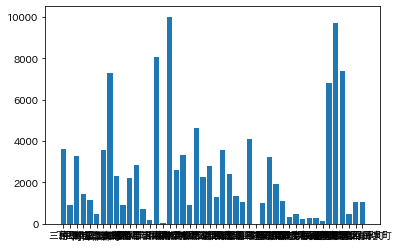

In [44]:
import matplotlib.pyplot as plt
import japanize_matplotlib

x = tmp.index
y = tmp.values
plt.bar(x, y)

<BarContainer object of 46 artists>

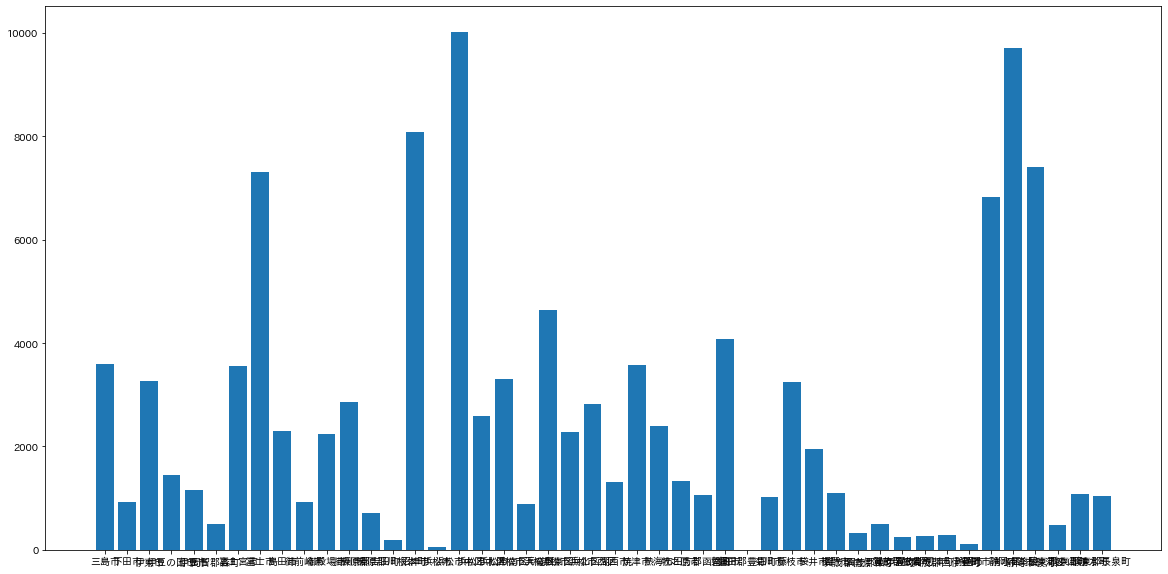

In [45]:
plt.figure(figsize=(20, 10))
plt.bar(x, y)

## ノック15

In [46]:
tmp.sort_values(inplace=True, ascending=True)
tmp

cityName
磐田郡豊田町         3
浜松市           47
静岡市          121
榛原郡川根本町      200
賀茂郡松崎町       253
賀茂郡河津町       265
賀茂郡西伊豆町      296
賀茂郡南伊豆町      323
駿東郡小山町       473
周智郡森町        499
賀茂郡東伊豆町      499
榛原郡吉田町       708
浜松市天竜区       890
御前崎市         916
下田市          935
菊川市         1030
駿東郡長泉町      1046
田方郡函南町      1053
駿東郡清水町      1077
裾野市         1096
伊豆市         1164
湖西市         1312
牧之原市        1328
伊豆の国市       1445
袋井市         1948
御殿場市        2233
浜松市浜北区      2270
島田市         2296
熱海市         2396
浜松市北区       2592
浜松市西区       2817
掛川市         2853
藤枝市         3243
伊東市         3261
浜松市南区       3310
富士宮市        3558
焼津市         3581
三島市         3600
磐田市         4085
浜松市東区       4636
静岡市清水区      6817
富士市         7308
静岡市駿河区      7398
沼津市         8073
静岡市葵区       9714
浜松市中区      10014
dtype: int64

<BarContainer object of 46 artists>

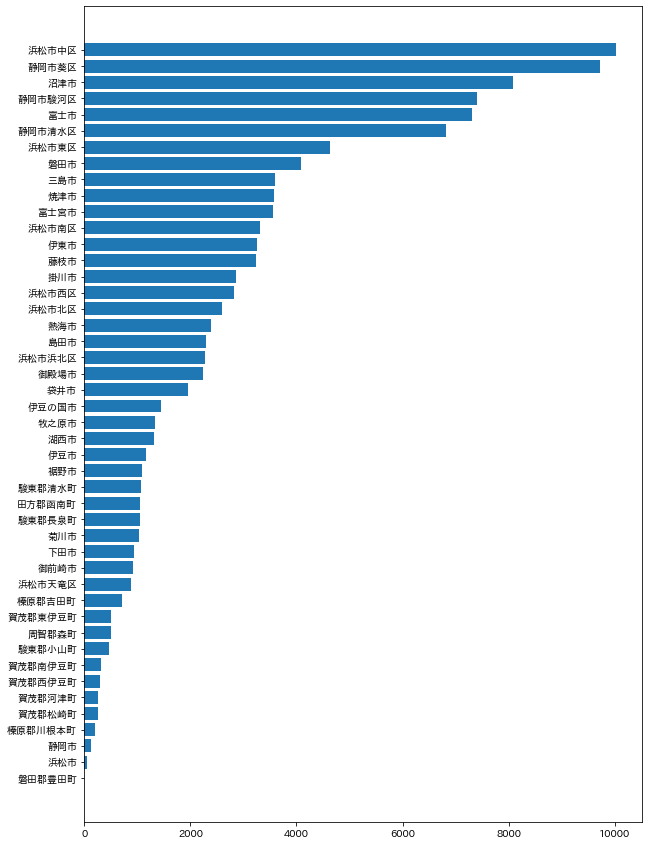

In [47]:
plt.figure(figsize=(10, 15))
x = tmp.index
y = tmp.values
plt.barh(x, y)

## ノック16

<BarContainer object of 10 artists>

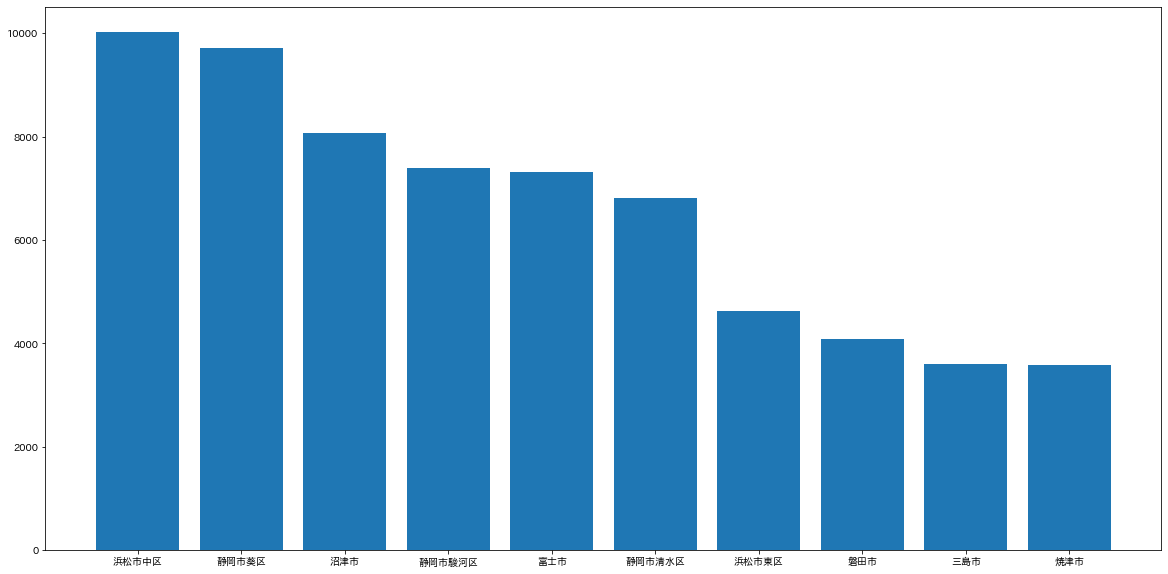

In [48]:
tmp.sort_values(inplace=True, ascending=False)
plt.figure(figsize=(20, 10))
x = tmp[:10].index
y = tmp[:10].values
plt.bar(x, y)


Text(0, 0.5, '法人数')

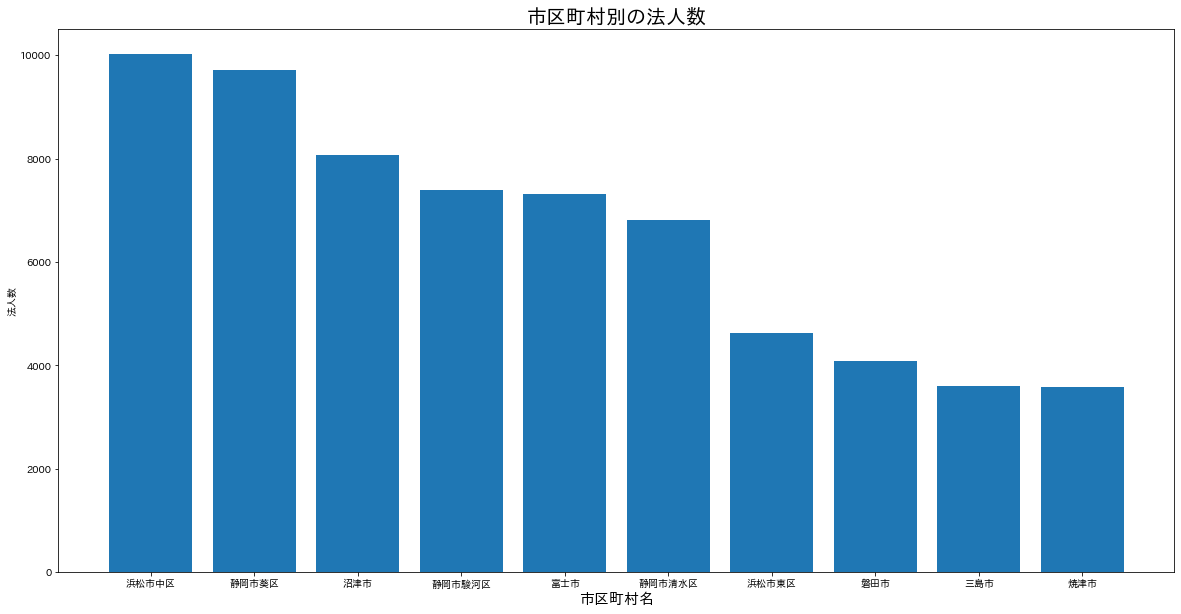

In [49]:
plt.figure(figsize=(20, 10))
plt.bar(x, y)
plt.title('市区町村別の法人数', fontsize=20)
plt.xlabel('市区町村名', fontsize=15)
plt.ylabel('法人数')


## ノック17

Text(7.5, 9000, '上位10の自治体を抜粋して表示')

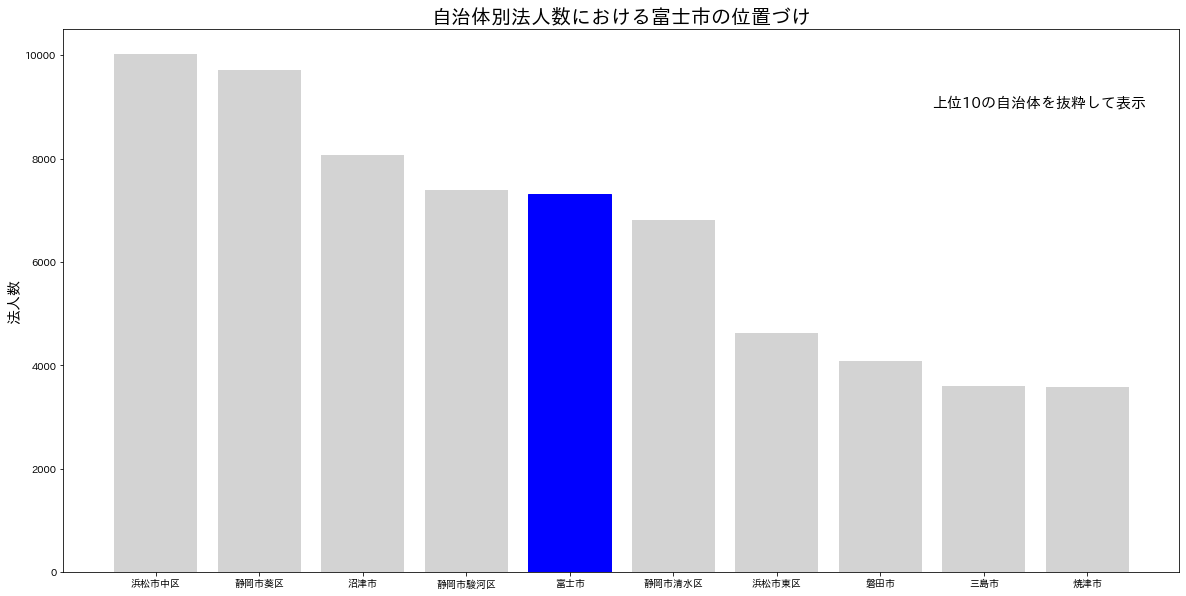

In [50]:
tmp.sort_values(inplace=True, ascending=False)
tmp = tmp[:10]
x = tmp.index
y = tmp.values
fig, ax = plt.subplots(figsize=(20, 10))
bar_list = ax.bar(x, y, color='lightgray')
bar_list[4].set_color('blue')
ax.set_title('自治体別法人数における富士市の位置づけ', fontsize=20);
ax.set_ylabel('法人数', fontsize=15)
ax.text(7.5, 9000, '上位10の自治体を抜粋して表示', fontsize=15)

## ノック18

In [51]:
base_time = pd.Timestamp.now(tz='Asia/Tokyo')
base_time

Timestamp('2021-12-15 00:12:50.973965+0900', tz='Asia/Tokyo')

In [52]:
data['assignmentDate'] = data['assignmentDate'].dt.tz_localize('Asia/Tokyo')
data.head()

,cityName,corporateNumber,name,process_kbn_name,assignmentDate,updateDate,update_fiscal_year,update_YM
0,静岡市清水区,1000013050072,清水簡易裁判所,NaN,2015-10-05 00:00:00+09:00,2018-04-02,2018,2018-04
1,浜松市中区,1000013050080,浜松簡易裁判所,NaN,2015-10-05 00:00:00+09:00,2018-04-02,2018,2018-04
2,磐田市,1000020222119,磐田市,NaN,2015-10-05 00:00:00+09:00,2018-04-05,2018,2018-04
3,焼津市,1000020222127,焼津市,NaN,2015-10-05 00:00:00+09:00,2018-04-05,2018,2018-04
4,掛川市,1000020222135,掛川市,NaN,2015-10-05 00:00:00+09:00,2020-09-29,2020,2020-09


In [57]:
delta = pd.Timedelta(10000, 'days')
tmp = data.loc[(base_time - data['assignmentDate'] <= delta)]
print(len(tmp))
tmp.head()

114982


,cityName,corporateNumber,name,process_kbn_name,assignmentDate,updateDate,update_fiscal_year,update_YM
0,静岡市清水区,1000013050072,清水簡易裁判所,NaN,2015-10-05 00:00:00+09:00,2018-04-02,2018,2018-04
1,浜松市中区,1000013050080,浜松簡易裁判所,NaN,2015-10-05 00:00:00+09:00,2018-04-02,2018,2018-04
2,磐田市,1000020222119,磐田市,NaN,2015-10-05 00:00:00+09:00,2018-04-05,2018,2018-04
3,焼津市,1000020222127,焼津市,NaN,2015-10-05 00:00:00+09:00,2018-04-05,2018,2018-04
4,掛川市,1000020222135,掛川市,NaN,2015-10-05 00:00:00+09:00,2020-09-29,2020,2020-09


<BarContainer object of 10 artists>

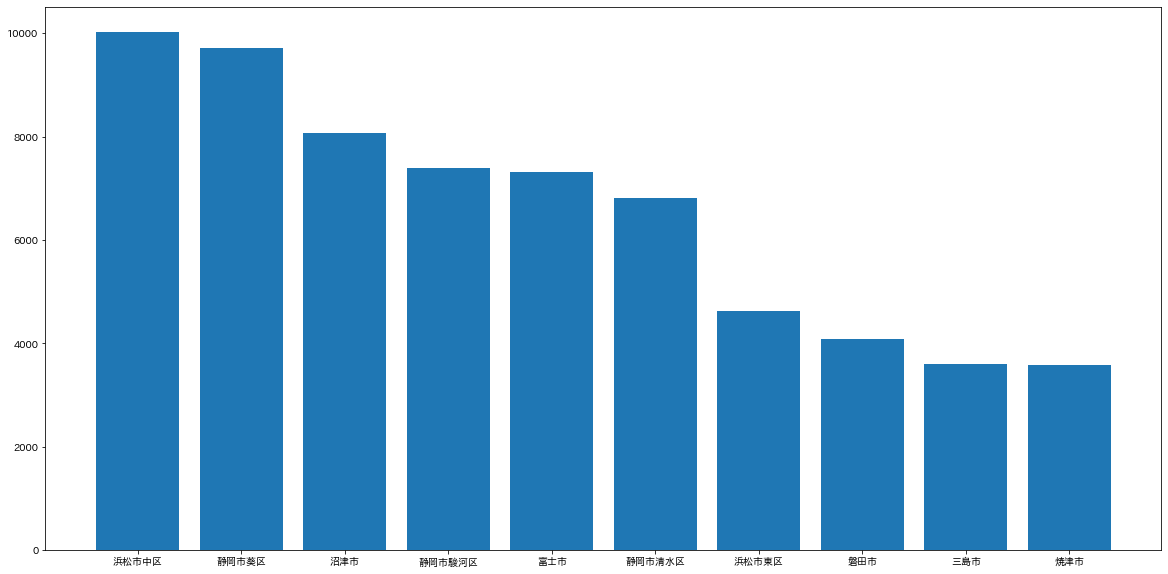

In [58]:
tmp = tmp.groupby('cityName').size()
tmp.sort_values(inplace=True, ascending=False)
tmp = tmp[:10]
x = tmp.index
y = tmp.values
plt.figure(figsize=(20, 10))
plt.bar(x, y)

In [59]:
base_time = pd.Timestamp('2020-04-16', tz='Asia/Tokyo')
tmp = data.loc[(data['process_kbn_name'] == '新規') & (base_time - data['assignmentDate'] <= delta)]
print(len(tmp))
tmp.head()

245


,cityName,corporateNumber,name,process_kbn_name,assignmentDate,updateDate,update_fiscal_year,update_YM
114613,牧之原市,1080002015434,有限会社ハイナンＤＣ,新規,2015-10-05 00:00:00+09:00,2021-04-01,2021,2021-04
114615,浜松市東区,1080401024928,ＡＧＡＩＮＮＴ’Ｓ株式会社,新規,2021-04-01 00:00:00+09:00,2021-04-01,2021,2021-04
114616,浜松市西区,1080401024936,株式会社通,新規,2021-04-01 00:00:00+09:00,2021-04-01,2021,2021-04
114618,静岡市清水区,2080001024071,株式会社ＧＲＡＣＥ,新規,2021-04-01 00:00:00+09:00,2021-04-01,2021,2021-04
114621,榛原郡吉田町,3080001024070,株式会社やまざき工業,新規,2021-04-01 00:00:00+09:00,2021-04-01,2021,2021-04


<BarContainer object of 10 artists>

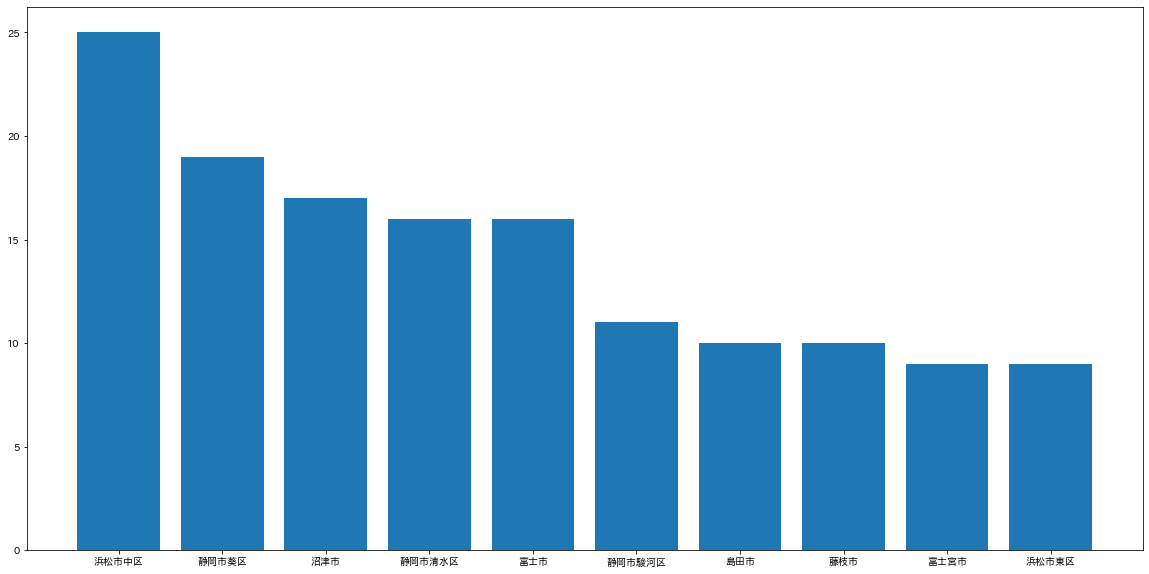

In [60]:
tmp = tmp.groupby(by='cityName').size()
tmp.sort_values(inplace=True, ascending=False)
tmp = tmp[:10]
x = tmp.index
y = tmp.values
plt.figure(figsize=(20, 10))
plt.bar(x, y)

## ノック19

In [62]:
tmp = data.dropna(subset=['cityName'])
tmp = tmp.loc[tmp['cityName'].str.match('^.*区$')]
print(len(tmp))
tmp.head()

50458


,cityName,corporateNumber,name,process_kbn_name,assignmentDate,updateDate,update_fiscal_year,update_YM
0,静岡市清水区,1000013050072,清水簡易裁判所,NaN,2015-10-05 00:00:00+09:00,2018-04-02,2018,2018-04
1,浜松市中区,1000013050080,浜松簡易裁判所,NaN,2015-10-05 00:00:00+09:00,2018-04-02,2018,2018-04
14,浜松市中区,1000030220005,赤佐財産区,NaN,2015-10-05 00:00:00+09:00,2020-09-29,2020,2020-09
28,浜松市中区,1010001050158,中貿開発株式会社,NaN,2015-10-05 00:00:00+09:00,2018-08-02,2018,2018-08
29,浜松市中区,1010001076005,デュメンオレンジジャパン株式会社,NaN,2015-10-05 00:00:00+09:00,2021-03-26,2020,2021-03


In [63]:
tmp = tmp.loc[(tmp['update_fiscal_year'] >= 2016) & (tmp['update_fiscal_year'] < 2021)]
print(len(tmp))
tmp.head()

26404


,cityName,corporateNumber,name,process_kbn_name,assignmentDate,updateDate,update_fiscal_year,update_YM
0,静岡市清水区,1000013050072,清水簡易裁判所,NaN,2015-10-05 00:00:00+09:00,2018-04-02,2018,2018-04
1,浜松市中区,1000013050080,浜松簡易裁判所,NaN,2015-10-05 00:00:00+09:00,2018-04-02,2018,2018-04
14,浜松市中区,1000030220005,赤佐財産区,NaN,2015-10-05 00:00:00+09:00,2020-09-29,2020,2020-09
28,浜松市中区,1010001050158,中貿開発株式会社,NaN,2015-10-05 00:00:00+09:00,2018-08-02,2018,2018-08
29,浜松市中区,1010001076005,デュメンオレンジジャパン株式会社,NaN,2015-10-05 00:00:00+09:00,2021-03-26,2020,2021-03


In [64]:
tmp = tmp.groupby(['cityName', 'update_fiscal_year']).size()
tmp.name = 'count'
tmp = tmp.reset_index()
print(len(tmp))
tmp.head(6)

50


,cityName,update_fiscal_year,count
0,浜松市中区,2016,745
1,浜松市中区,2017,365
2,浜松市中区,2018,1891
3,浜松市中区,2019,1303
4,浜松市中区,2020,1137
5,浜松市北区,2016,96


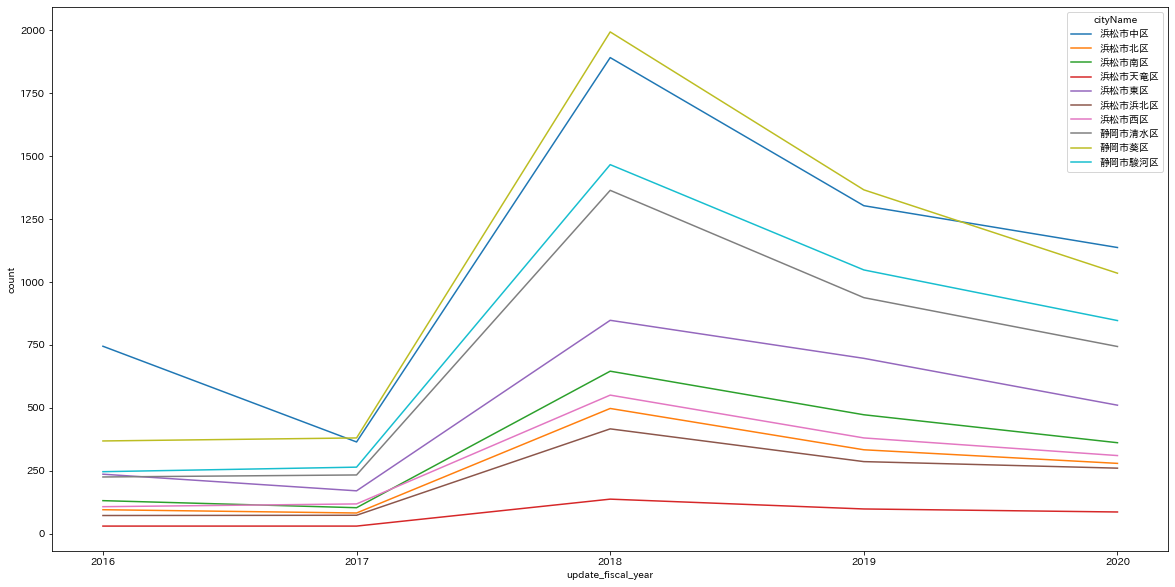

In [67]:
plt.figure(figsize=(20, 10))
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True))
img = sns.lineplot(x=tmp['update_fiscal_year'], y=tmp['count'], hue=tmp['cityName'])

## ノック20

In [68]:
data_file = 'knock20_graphdata.csv'
data.to_csv(os.path.join(output_dir, data_file), index=False)

In [69]:
graph_file = 'knock20_graph.png'
fig = img.get_figure()
fig.savefig(os.path.join(output_dir, graph_file))